# <font color='blue'>Week 6-DL: Intro to Tensorflow</font>

![EB.png](ENSTABrain.png)

# Review

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

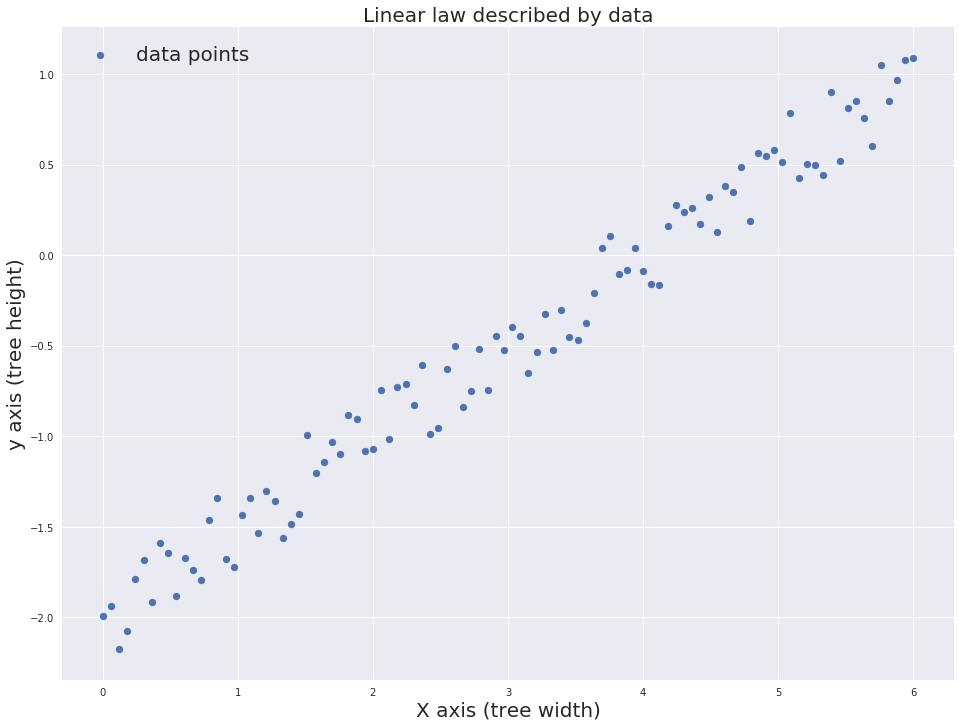

In [2]:
np.random.seed(101)
#generate data
X = np.linspace(0, 6, 100)
y = 0.5 * X - 2 + np.random.uniform(-0.25, 0.25, 100)

plt.figure(figsize=(16, 12))
plt.scatter(X, y, label='data points')
plt.legend(fontsize=20)
plt.xlabel('X axis (tree width)', fontsize=20)
plt.ylabel('y axis (tree height)', fontsize=20)
plt.title('Linear law described by data', fontsize=20)
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

#use simple linear regression to approximate this data
X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1, 1), y, test_size=0.2, random_state=101)

model = LinearRegression()
model.fit(X_train, y_train)

prediction = model.predict(X_test)

In [4]:
def evaluate(y_true, y_pred):
    print('Mean absolute Error: {}'.format(mean_absolute_error(y_true, y_pred)))
    print('R_square score: {}'.format(r2_score(y_true, y_pred)))

evaluate(y_test, prediction)

Mean absolute Error: 0.13085699328126305
R_square score: 0.9690240020642359


In [5]:
print('coefficient: ', model.coef_)
print('Intercept (or bias): ', model.intercept_)

coefficient:  [0.4959141]
Intercept (or bias):  -1.9916862493262777


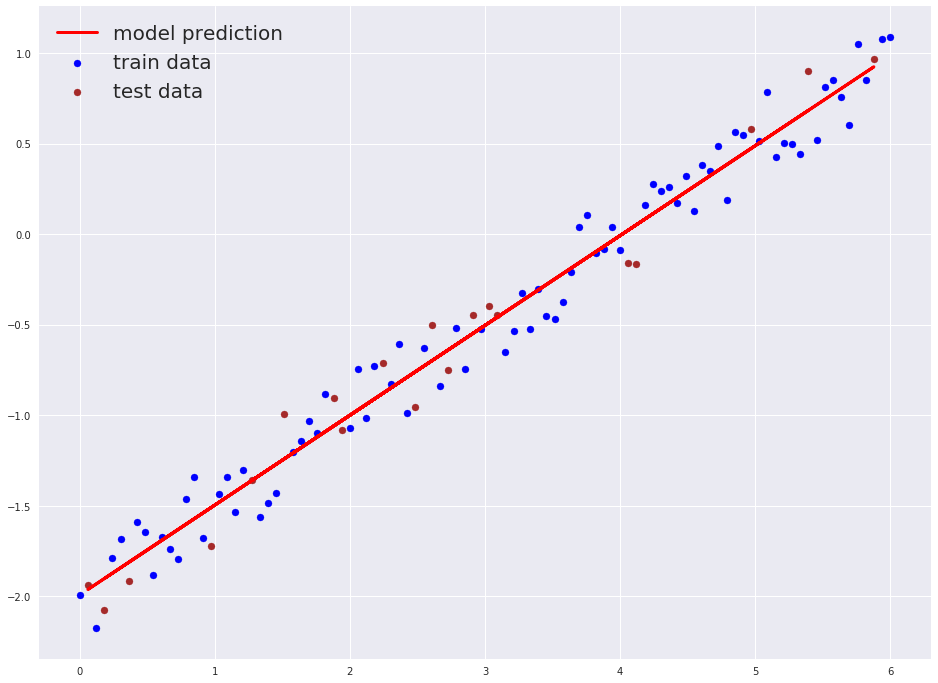

In [6]:
plt.figure(figsize=(16, 12))
plt.scatter(X_train, y_train, color='blue', label='train data')
plt.scatter(X_test, y_test, color='brown',label='test data')
plt.plot(X_test, prediction, lw=3, color='red', label='model prediction')
plt.legend(fontsize=20)
plt.show()

# Python and Object Oriented

In [7]:
#Recreate the model from 0
class LinearModel1D():
    def __init__(self, learning_rate=0.001, eps=1e-3, max_steps=100):
        np.random.seed(101)
        self.w_ = np.random.rand() * 2 - 1 #coefficient (weight)
        self.b_ = 0 #intercept (bias)
        self.eps = eps #acceptable error
        self.max_steps = max_steps #stop training after these steps
        self.learning_rate = learning_rate #gradient descent step
        self.loss = 1 #initial loss
        self.cost = []
        self.step = 0
        
    def train(self, X, y):
        X = X.reshape(-1)
        #train loop
        while (self.loss > self.eps) and (self.step < self.max_steps):
            pred = self._forward(X)
            self.loss = self._compute_error(y, pred)
            self.cost.append(self.loss)
            self._rectifie(X, y, pred)
            self.step += 1
        print('total steps: ',self.step)
        
    def _forward(self, X): 
        #makes a prediction
        return np.dot(X, self.w_) + self.b_
    
    def _compute_error(self, y, pred):
        #computes the error after one prediction
        return mean_absolute_error(y, pred)
    
    def _rectifie(self, X, y, pred):
        #gradient descent to optimize our parameters
        error_derivative = np.where(pred > y, 1, np.where(pred < y, -1 ,0))
        w_descent_direction = - X.T.dot(error_derivative)
        b_descent_direction = - error_derivative.sum() * 1
        
        self.w_ += self.learning_rate * w_descent_direction
        self.b_ += self.learning_rate * b_descent_direction
    
    def predict(self, X):
        return self._forward(X)

We can then use our newly created model as we usually do with scikit learn

total steps:  1500

coefficient:  0.49339119479883065
intercept(bias):  -1.9689999999999754

Mean absolute Error: 0.12995586088290206
R_square score: 0.9685887872437309


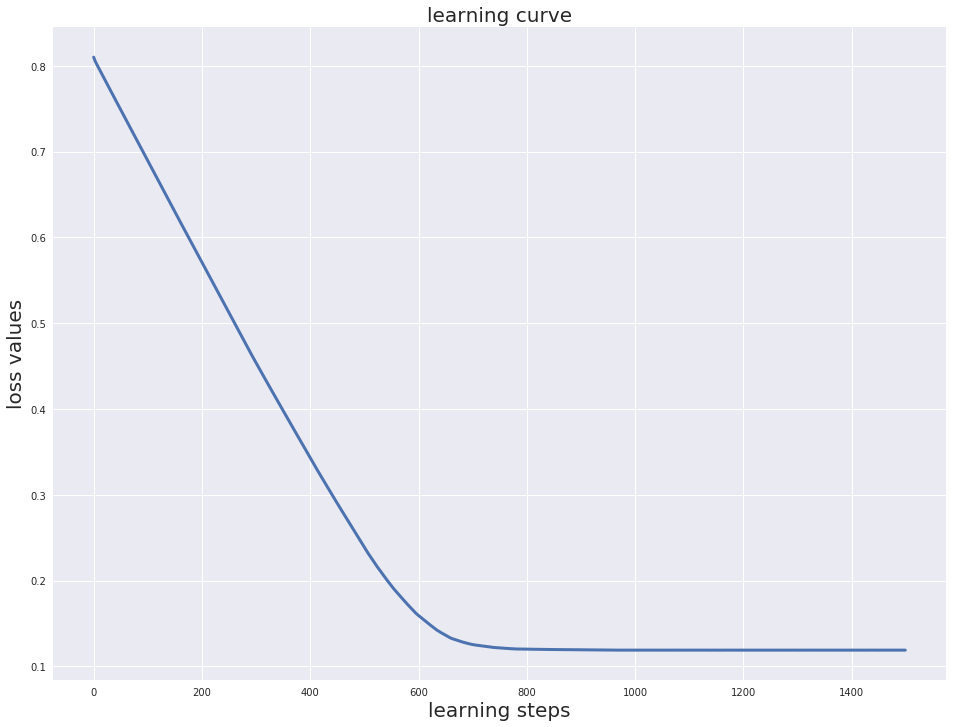

In [8]:
custom_model = LinearModel1D(learning_rate=0.0001, eps=0.1, max_steps=1500)
custom_model.train(X_train, y_train)
print('\ncoefficient: ', custom_model.w_)
print('intercept(bias): ', custom_model.b_)

print()
y_pred = custom_model.predict(X_test)
evaluate(y_test, y_pred)

plt.figure(figsize=(16, 12))
plt.plot(range(custom_model.step), custom_model.cost, lw=3)
plt.title('learning curve', fontsize=20)
plt.xlabel('learning steps', fontsize=20)
plt.ylabel('loss values', fontsize=20)
plt.show()

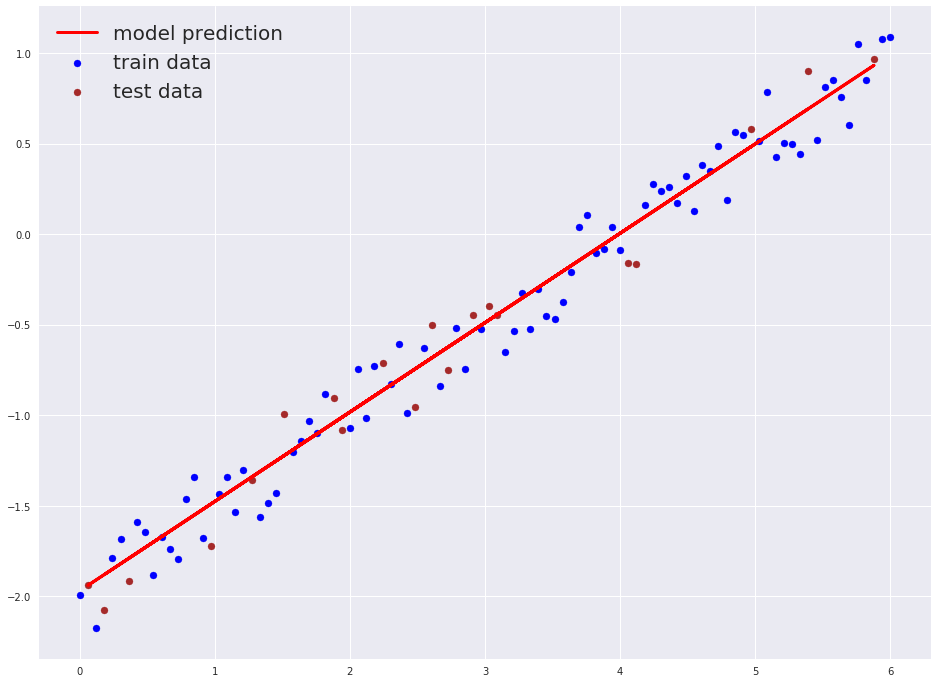

In [9]:
plt.figure(figsize=(16, 12))
plt.scatter(X_train, y_train, label='train data', color='blue')
plt.scatter(X_test, y_test, label='test data', color='brown')
plt.plot(X_test, y_pred, lw=3, color='red', label='model prediction')
plt.legend(fontsize=20)
plt.show()

# First steps in tensorflow


## Overview

TensorFlow is a programming system in which you represent computations as graphs. Nodes in the graph are called ops (short for operations). An op takes zero or more Tensors, performs some computation, and produces zero or more Tensors. In TensorFlow terminology, a Tensor is a typed multi-dimensional array. For example, you can represent a mini-batch of images as a 4-D array of floating point numbers with dimensions [batch, height, width, channels].

A TensorFlow graph is a description of computations. To compute anything, a graph must be launched in a Session. A Session places the graph ops onto Devices, such as CPUs or GPUs, and provides methods to execute them. These methods return tensors produced by ops as numpy ndarray objects in Python, and as tensorflow::Tensor instances in C and C++.

## The computation graph

TensorFlow programs are usually structured into a construction phase, that assembles a graph, and an execution phase that uses a session to execute ops in the graph.

For example, it is common to create a graph to represent and train a neural network in the construction phase, and then repeatedly execute a set of training ops in the graph in the execution phase.

TensorFlow can be used from C, C++, and Python programs. It is presently much easier to use the Python library to assemble graphs, as it provides a large set of helper functions not available in the C and C++ libraries.

The session libraries have equivalent functionalities for the three languages.

![tensors_flowing.gif](tensors_flowing.gif)

## Basic usage

In [10]:
import tensorflow as tf

# Create a Constant op that produces a 1x2 matrix.  The op is
# added as a node to the default graph.
#
# The value returned by the constructor represents the output
# of the Constant op.
matrix1 = tf.constant([[3., 3.]])

# Create another Constant that produces a 2x1 matrix.
matrix2 = tf.constant([[2.],[2.]])

# Create a Matmul op that takes 'matrix1' and 'matrix2' as inputs.
# The returned value, 'product', represents the result of the matrix
# multiplication.
product = tf.matmul(matrix1, matrix2)

/home/silvershade/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [11]:
# Launch the default graph.
sess = tf.Session()

# To run the matmul op we call the session 'run()' method, passing 'product'
# which represents the output of the matmul op.  This indicates to the call
# that we want to get the output of the matmul op back.
#
# All inputs needed by the op are run automatically by the session.  They
# typically are run in parallel.
#
# The call 'run(product)' thus causes the execution of three ops in the
# graph: the two constants and matmul.
#
# The output of the matmul is returned in 'result' as a numpy `ndarray` object.
result = sess.run(product)
print(result)

# Close the Session when we're done.
sess.close()

[[12.]]


In [12]:
#We can alternatively
with tf.Session() as sess:
    result = sess.run(product)
    print(result)

[[12.]]


In [13]:
#We can go few steps further by adding more computation steps to the graph
scalar = tf.constant([1.])
summed_product = product + scalar

with tf.Session() as sess:
    result = sess.run(summed_product)
    print(result)

[[13.]]


## Create a simple ANN on our created dataset

In [14]:
y_train = y_train.reshape(-1, 1)

In [15]:
#Initialize placeholders that will contain our inputs later when running the graph
X_train_tf = tf.placeholder(shape=(None, 1), dtype=tf.float32)
y_train_tf = tf.placeholder(shape=(None, 1), dtype=tf.float32)
X_test_tf = tf.placeholder(shape=(None, 1), dtype=tf.float32)

#Create the trainable variables
W = tf.Variable(tf.random_normal(shape=[1, 1], stddev=0.1))
b = tf.Variable(tf.zeros([1]))

#Compute output of the ANN
out = tf.matmul(X_train_tf, W) + b #Activation function is identity ==> layer output is a linear function
#Calculate the loss (Mean Absolute Error)
abs_loss = tf.reduce_mean(tf.abs(out - y_train_tf))
#Reset our parameters values using a simple Gradient Descent
optimize = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(abs_loss)

#Model prediction after training (simple linear regression)
prediction = tf.matmul(X_test_tf, W) + b

max_steps = 1500
global_step = 0
with tf.Session() as sess:
    #Start by initializing the variables to train
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    #map our placeholders to their variables
    fd = {X_train_tf: X_train,
          y_train_tf: y_train,
          X_test_tf: X_test}
    #losses list
    cost = []
    #Train_loop
    while global_step < max_steps:
        #Run the graph
        loss, opt = sess.run([abs_loss, optimize], feed_dict=fd)
        cost.append(loss)
        global_step += 1
        
    print('final loss: ', loss)
    print('final step: ', global_step)
    print()
    
    y_pred = sess.run(prediction, feed_dict=fd)
    evaluate(y_test, y_pred)
    
    print()
    print('final weight: ', sess.run(W))
    print('final bias: ', sess.run(b))

final loss:  0.11900755
final step:  1500

Mean absolute Error: 0.1302385655533527
R_square score: 0.9685631855078124

final weight:  [[0.4930575]]
final bias:  [-1.9692487]


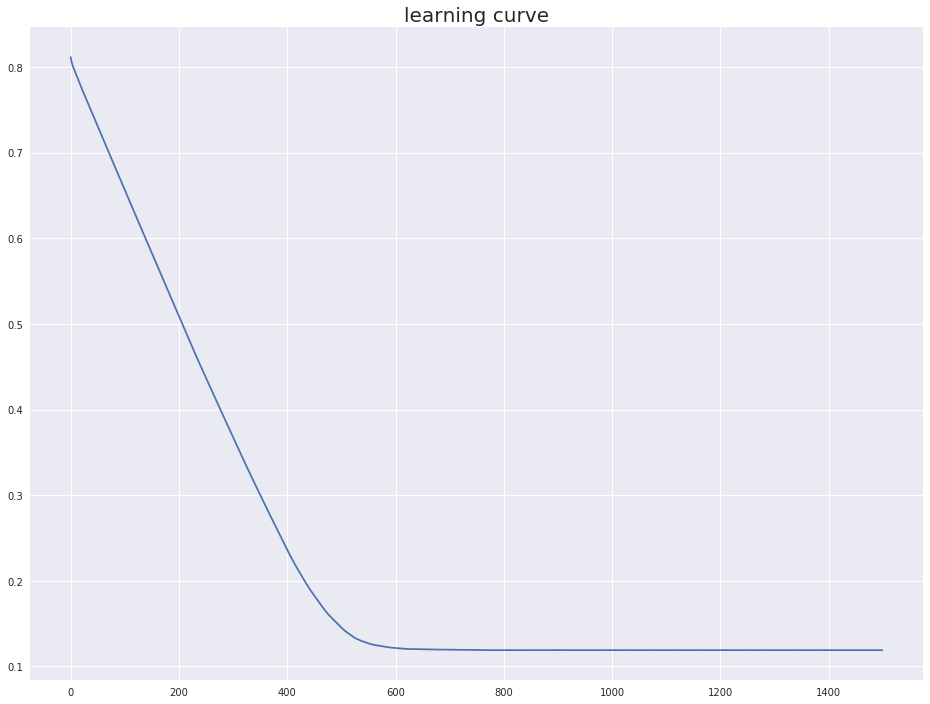

In [16]:
plt.figure(figsize=(16, 12))
plt.plot(range(global_step), cost)
plt.title('learning curve', fontsize=20)
plt.show()

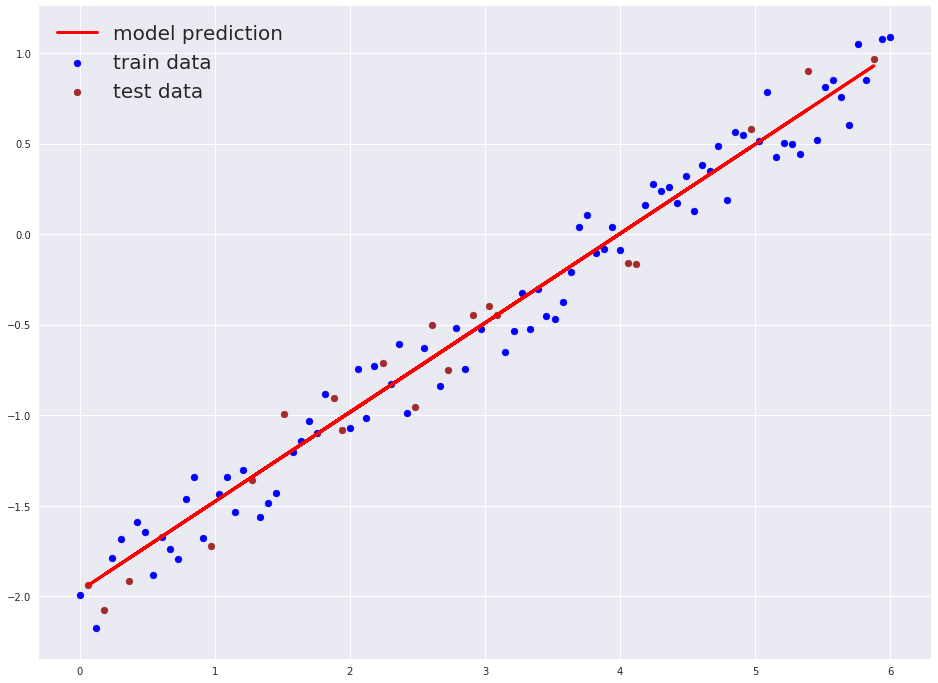

In [17]:
plt.figure(figsize=(16, 12))
plt.scatter(X_train, y_train, color='blue', label='train data')
plt.scatter(X_test, y_test, color='brown',label='test data')
plt.plot(X_test, y_pred, lw=3, color='red', label='model prediction')
plt.legend(fontsize=20)
plt.show()